# Clase 7 - Docker

<a id="section_toc"></a> 
## Tabla de Contenidos

[¿Qué es Docker y por qué es útil?. Virtualización vs. contenedorización.](#section_intro)

[Instalación y configuración básica.](#section_instalacion)

[Dockerfiles y construcción de imágenes. ](#section_navegacion_linux)

[Ejecutar y gestionar contenedores. Uso básico de contenedores](#section_creacion)

[Servidores, Puertos y Docker: Entendiendo la Exposición de Servicios](#section_cr)

[Proyecto Demo en un repositorio](#section_crea)

---

<a id="section_intro"></a> 
## ¿Qué es Docker y por qué es útil?. Virtualización vs. contenedorización. 

Docker es una plataforma de contenedorización que permite desarrollar, enviar y ejecutar aplicaciones de manera eficiente en contenedores. Estos contenedores encapsulan todo lo necesario para que una aplicación se ejecute (código, bibliotecas, dependencias, configuraciones), de forma que la aplicación sea independiente del sistema operativo o el hardware del entorno en el que se ejecute.

**DOCUMENTACIÓN**: https://docs.docker.com/

**Componentes principales de Docker**:

* Contenedores: Son instancias ejecutables de una imagen de Docker que contienen una aplicación y todas sus dependencias.
  
* Imágenes: Son plantillas inmutables que incluyen el sistema operativo, las dependencias y la aplicación. Los contenedores se crean a partir de imágenes.
  
* Docker Engine: Es el motor que gestiona la creación, ejecución y parada de los contenedores.
  
* Docker Hub: Es un registro de imágenes, tanto públicas como privadas, que se pueden compartir y reutilizar.



### ¿Por qué Docker es útil?

* **Portabilidad**: Docker permite ejecutar aplicaciones de manera consistente en cualquier entorno, ya sea en una computadora local, un servidor en la nube o un entorno de producción. Al empaquetar todo dentro de un contenedor, se eliminan los problemas de "funciona en mi máquina pero no en producción".
  
* **Aislamiento**: Cada contenedor tiene su propio entorno de ejecución, lo que garantiza que no haya conflictos entre las dependencias o configuraciones de diferentes aplicaciones. Esto es especialmente útil en entornos de desarrollo donde múltiples aplicaciones, con diferentes versiones de bibliotecas o herramientas, deben coexistir.
  
* **Eficiencia en el uso de recursos**: A diferencia de las máquinas virtuales, los contenedores no necesitan un sistema operativo completo para cada instancia. Esto reduce el uso de recursos, ya que los contenedores comparten el kernel del sistema operativo del host, haciendo que los contenedores sean más ligeros y rápidos de iniciar.
  
* **Rapidez en el ciclo de desarrollo**: Los contenedores pueden ser creados, destruidos y replicados en cuestión de segundos, lo que facilita probar diferentes versiones de una aplicación, escalar servicios y desplegar cambios rápidamente. Esto mejora el ciclo de vida del desarrollo, pruebas y despliegue continuo (CI/CD)
  
* **Escalabilidad**: Docker facilita el escalado horizontal, permitiendo desplegar múltiples contenedores de una aplicación en distintos nodos de una red. Esto es particularmente útil en arquitecturas basadas en microservicios.

### Virtualización vs. Contenerización

#### **Virtualización Tradicional**:

La virtualización es una tecnología que permite ejecutar varios sistemas operativos sobre un único servidor físico, mediante la creación de máquinas virtuales (VMs). Cada VM contiene su propio sistema operativo, archivos binarios, dependencias y la aplicación en sí. Para gestionar estas VMs, se utiliza un hipervisor, que se encarga de asignar los recursos del hardware físico a cada máquina virtual.
  
**Características de la virtualización:**:
  
* **Hipervisor**: Software que gestiona las máquinas virtuales. Puede ser un hipervisor tipo 1 (como VMware ESXi o Microsoft Hyper-V) que se ejecuta directamente sobre el hardware, o un hipervisor tipo 2 (como VirtualBox), que corre sobre un sistema operativo huésped.
  
* **Máquinas Virtuales**: Cada VM tiene su propio sistema operativo, kernel y controladores de hardware. Esto aísla completamente los entornos, pero también conlleva una sobrecarga significativa en términos de recursos de hardware.
  
* **Pesado en recursos**: Dado que cada VM incluye su propio sistema operativo, el uso de memoria y CPU es elevado. Además, el arranque de una VM puede ser lento.

**Ventajas de la virtualización**:

* **Aislamiento total**: Cada VM está completamente separada del sistema operativo anfitrión y de otras VMs.

* **Soporte de diferentes sistemas operativos**: Puedes ejecutar diferentes sistemas operativos simultáneamente en el mismo hardware.

**Desventajas de la virtualización**:
  
* **Sobreuso de recursos**: Las VMs requieren más recursos, ya que cada una ejecuta un sistema operativo completo.
  
* **Lento en el arranque**: El proceso de inicialización de una VM puede ser largo debido a la necesidad de arrancar todo un sistema operativo.
  
* **Coste operativo**: En entornos donde se requiere el despliegue de múltiples VMs, el uso de recursos se vuelve costoso.

#### **Contenerización**:

A diferencia de la virtualización, la contenerización (con Docker como ejemplo) no virtualiza el hardware, sino el sistema operativo. Los contenedores comparten el núcleo del sistema operativo del host, pero se aíslan unos de otros a nivel de proceso. Esto permite que múltiples contenedores puedan ejecutarse en el mismo sistema operativo, con una sobrecarga de recursos mínima.
  
**Características de la contenerización**:
  
* **Compartición del Kernel**: Todos los contenedores en un mismo host comparten el mismo kernel del sistema operativo, reduciendo la necesidad de ejecutar múltiples sistemas operativos.
  
* **Ligero**: Los contenedores son mucho más ligeros que las VMs, ya que no incluyen un sistema operativo completo. Sólo incluyen las bibliotecas y dependencias necesarias para la aplicación.
  
* **Arranque rápido**: Los contenedores pueden iniciarse en segundos, en lugar de los minutos que puede tardar una VM.

**Ventajas de la contenerización**:

* **Mayor eficiencia en el uso de recursos**: Los contenedores requieren menos recursos que las VMs, ya que comparten el mismo kernel.

* **Portabilidad**: Un contenedor construido en un entorno funcionará en cualquier otro entorno con Docker, sin importar el sistema operativo subyacente.

* **Velocidad**: Los contenedores pueden crearse y destruirse muy rápidamente, facilitando el despliegue continuo y escalable de aplicaciones.

* **Menos sobrecarga**: Al no tener que cargar múltiples sistemas operativos, los contenedores son más eficientes y ocupan menos espacio en disco y memoria.

**Desventajas de la contenerización**:
  
* **Menor aislamiento que las VMs**: Aunque los contenedores están aislados a nivel de proceso, no tienen el mismo nivel de separación que una VM.
  
* **Dependencia del Kernel**: Los contenedores dependen del kernel del sistema operativo subyacente, lo que significa que no puedes ejecutar contenedores de Windows en un host Linux y viceversa, a menos que utilices soluciones como Docker Desktop con soporte de virtualización.

#### Comparación Directa: Virtualización vs. Contenerización

| **Característica**           | **Virtualización (VMs)**                         | **Contenerización (Docker)**                |
|--------------------------|-----------------------------------------------|-----------------------------------------|
| **Recursos**             | Más uso de recursos (requiere SO completo)     | Más eficiente (comparten el kernel)     |
| **Tiempo de arranque**    | Lento (arranca un SO completo)                | Rápido (en segundos)                    |
| **Aislamiento**           | Aislamiento fuerte a nivel de hardware        | Aislamiento a nivel de proceso          |
| **Portabilidad**          | Limitada (necesita compatibilidad con hipervisor) | Alta (cualquier entorno con Docker)     |
| **Sobrecarga operativa**  | Alta (cada VM tiene su propio SO)             | Baja (sólo se empaquetan dependencias)  |
| **Escalabilidad**         | Escalable, pero con sobrecarga de recursos    | Altamente escalable y ligero            |
| **Compatibilidad de SO**  | Soporta múltiples SOs en un host              | Depende del kernel del SO subyacente    |




### Conclusión: ¿Por qué Docker es útil?

Para los científicos de datos y desarrolladores, Docker es una herramienta clave porque resuelve problemas comunes de despliegue y reproducibilidad. Docker permite ejecutar modelos, experimentos o pipelines de datos en un entorno controlado que puede replicarse en cualquier máquina. Esto es crucial en proyectos colaborativos o en la transferencia de aplicaciones desde desarrollo hasta producción, sin que surjan problemas de compatibilidad o configuración. Además, su capacidad de escalabilidad lo hace ideal para implementar entornos en la nube o para arquitecturas de microservicios.



## Instalación y Configuración Básica <a id="section_instalacion"></a> 

### Paso 1. Descarga Docker Desktop

Dirígete a https://docs.docker.com/get-started/get-docker/ y selecciona `Docker Desktop for Mac` o `Docker Desktop for Windows` según corresponda.  
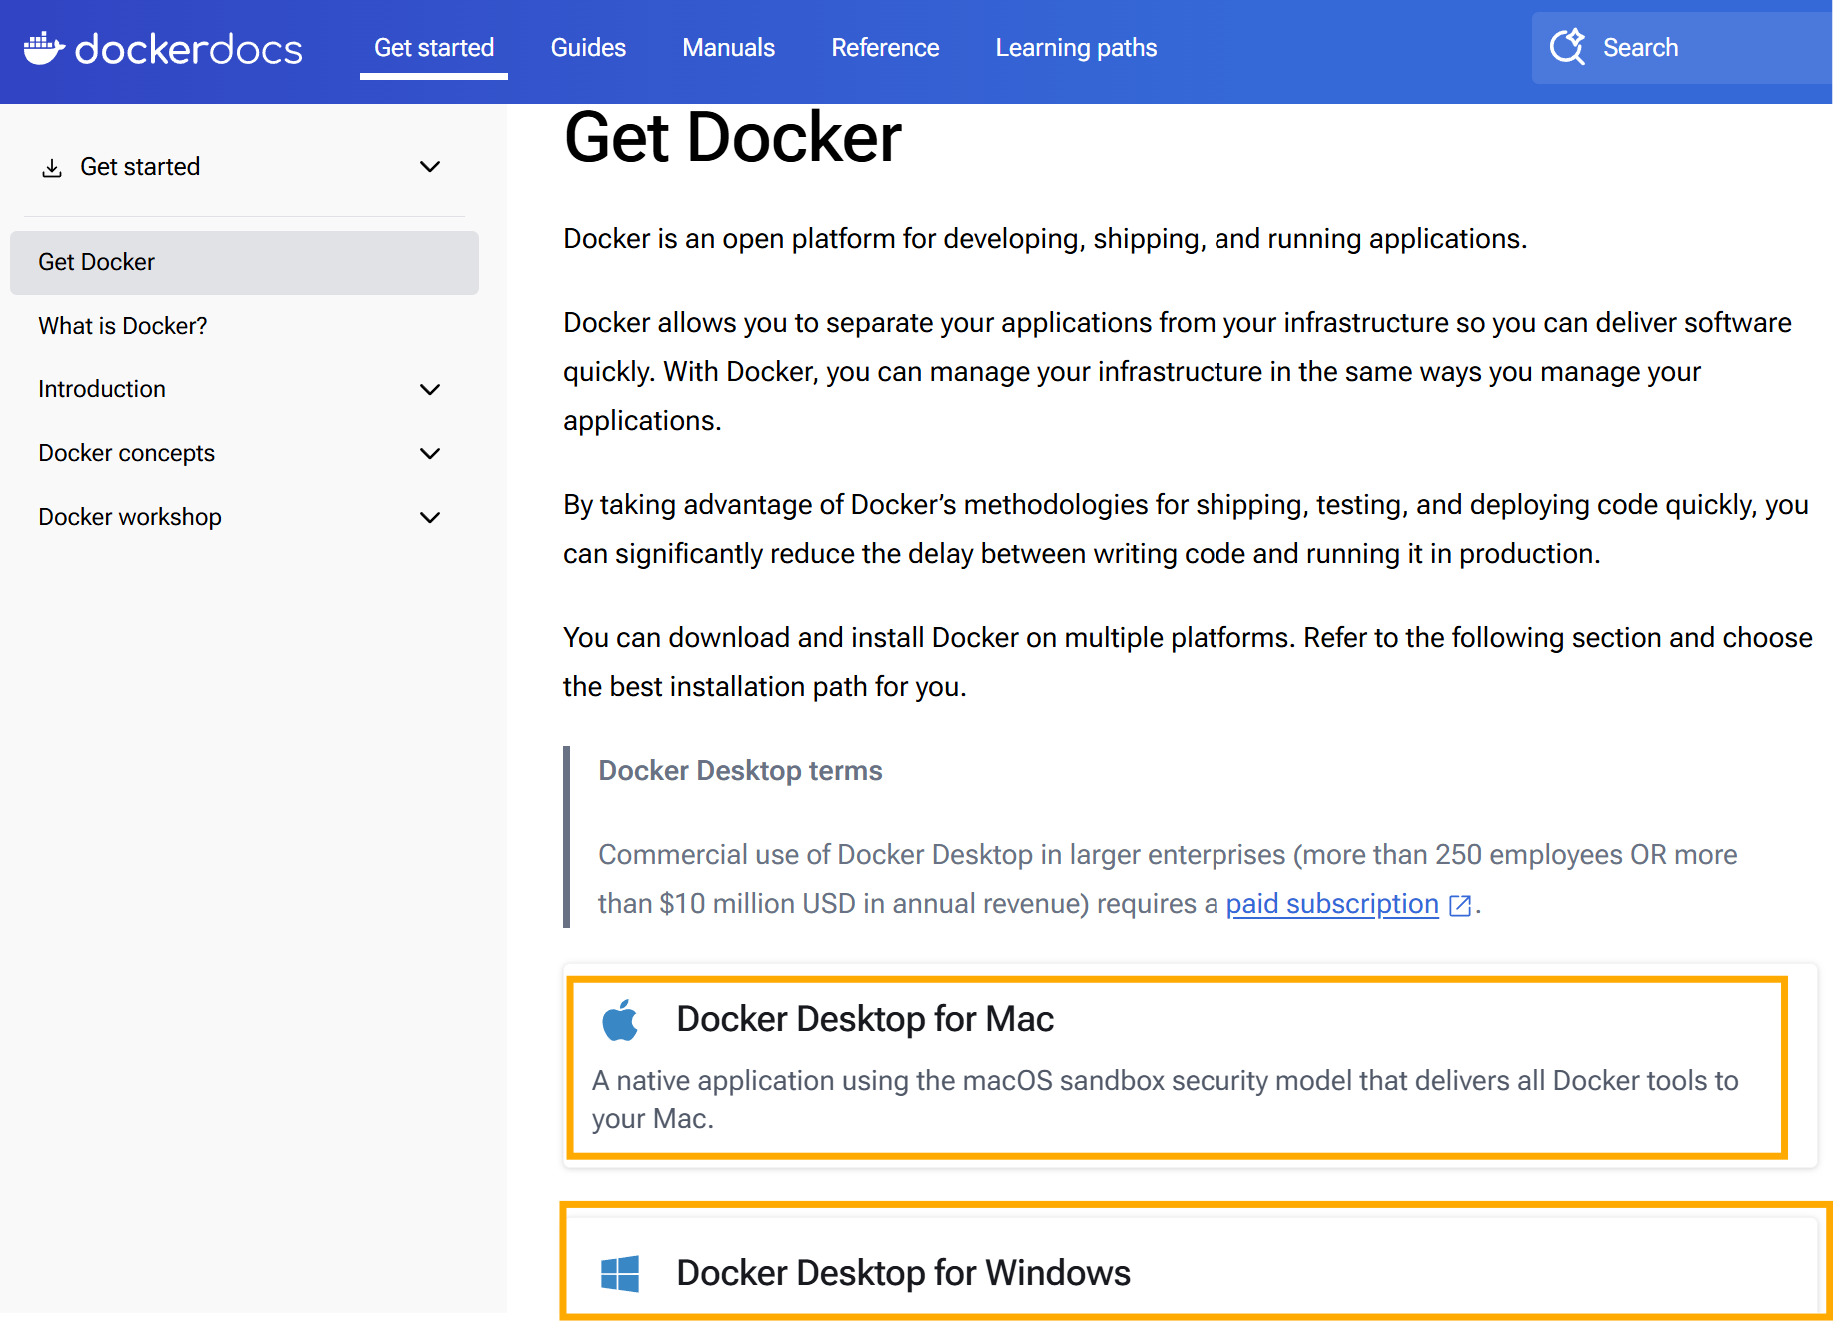

Al hacerlo entraras a la documentación sobre la instalación para el sistema que elegiste. Esta página contiene la URL de descarga, información sobre los requisitos del sistema e instrucciones sobre cómo instalar Docker Desktop.

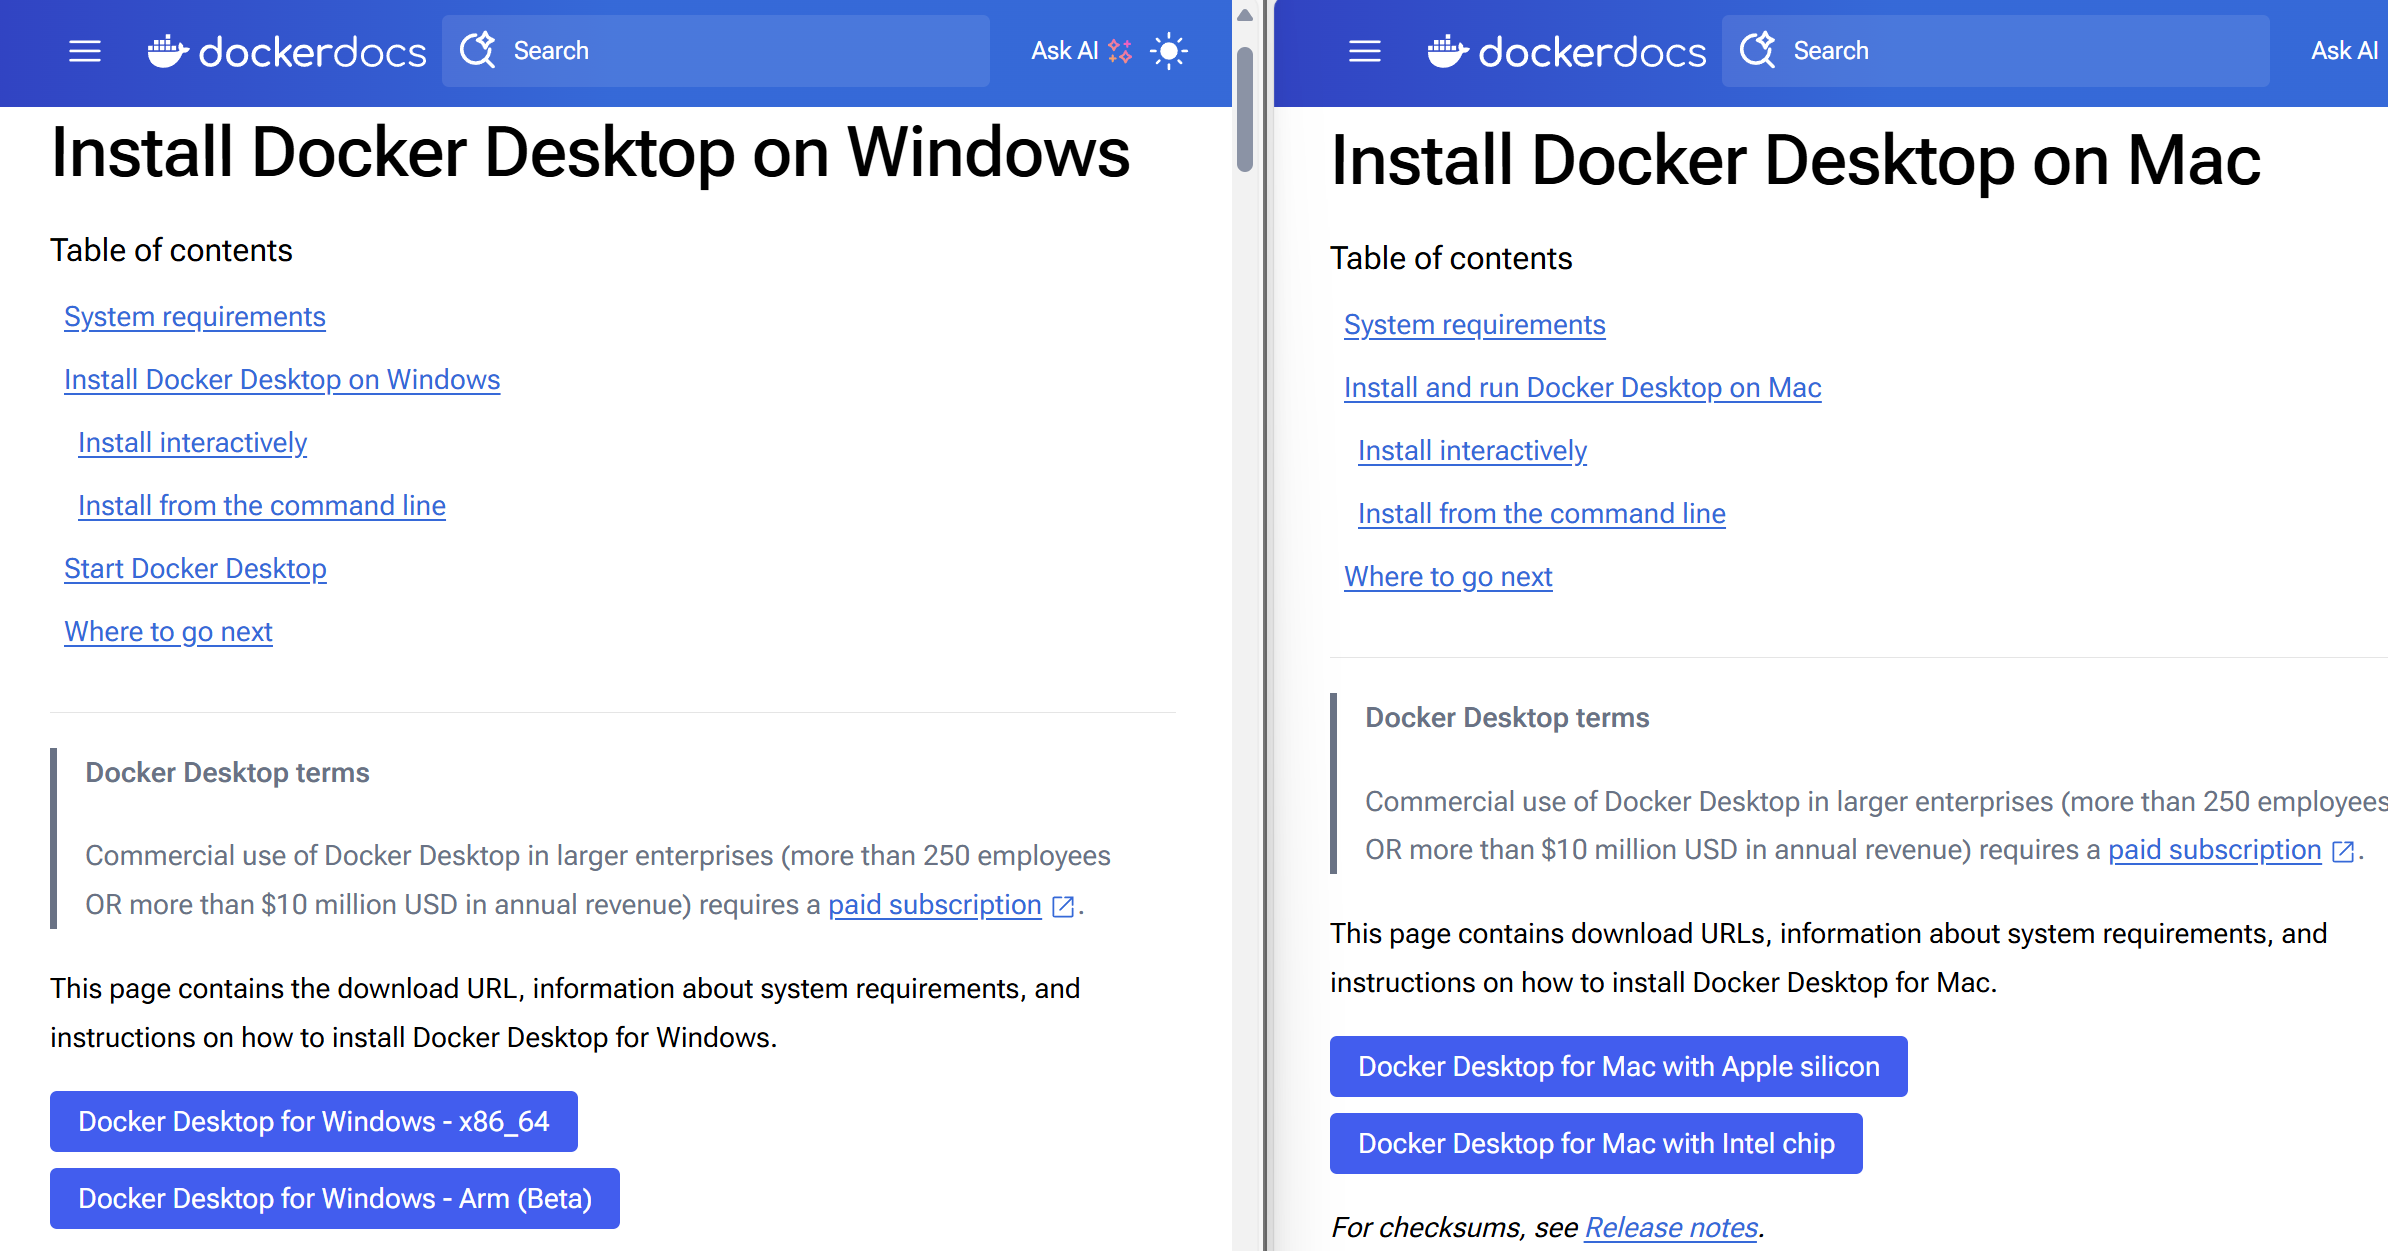


### Paso 2. Instalación

Hay varias formas de instalar Docker Desktop pero usaremos el instalador previamente descargado desde de la documentación. Las siguientes imágenes son de la instalación para Windows, para mac seguir los pasos de la documentación.

Tras la descarga, ejecuta el archivo `Docker Desktop Installer.exe`. Lo primero que aparecerá tras ejecutar el instalador son dos opciones previas a la instalación:

* Usar WSL 2 en lugar de Hyper-V (recomendado). Esto es importante porque WSL 2 ofrece mejor rendimiento y compatibilidad para ejecutar contenedores en Windows.
  
* Añadir un acceso directo al escritorio, lo cual facilita la apertura rápida de Docker.

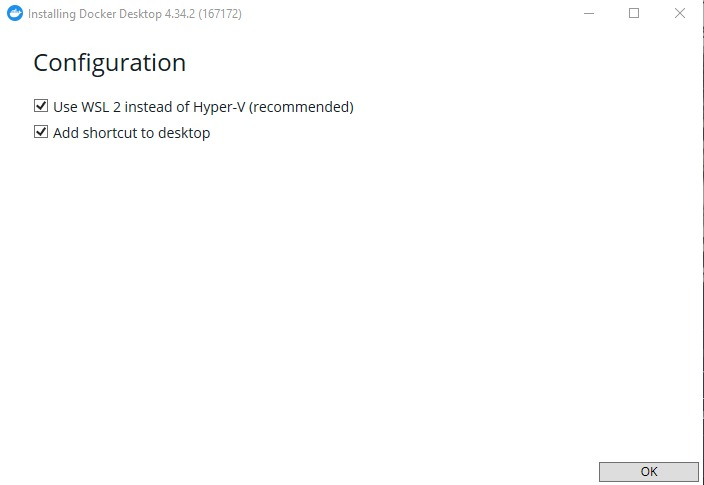

Luego de dar ok, comienza la instalación donde Docker Desktop está desempaquetando los archivos necesarios para la instalación en el sistema.

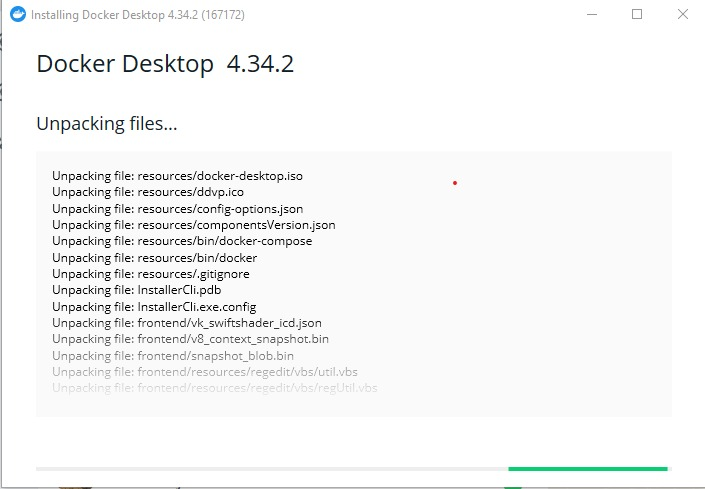

Al finalizar la instalación se indica que la instalación ha sido completada exitosamente. Es necesario cerrar sesión en Windows para que los cambios surtan efecto.

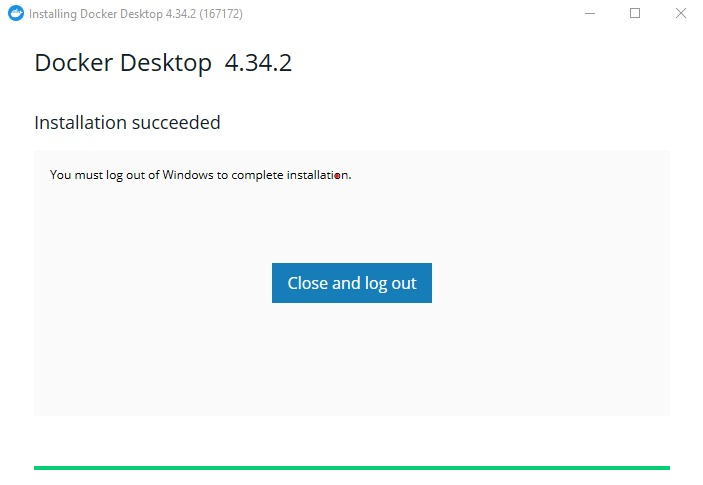

### Configuración Básica

Una vez que vuelvas a iniciar sesión, puedes abrir Docker Desktop desde el escritorio y te saldrá lo siguiente. En esta pantalla, Docker te da la opción de registrarte con una cuenta de Docker, ya sea para trabajo o uso personal. Sin embargo, puedes hacer clic en Skip (Omitir) si prefieres no crear una cuenta y empezar a usar Docker directamente. Si te registras en este caso para uso personal, podrás usar Docker Hub que es un repositorio público de imágenes de contenedores, donde tendrás la oportunidad  de publicar tus imágenes de soluciones prediseñadas

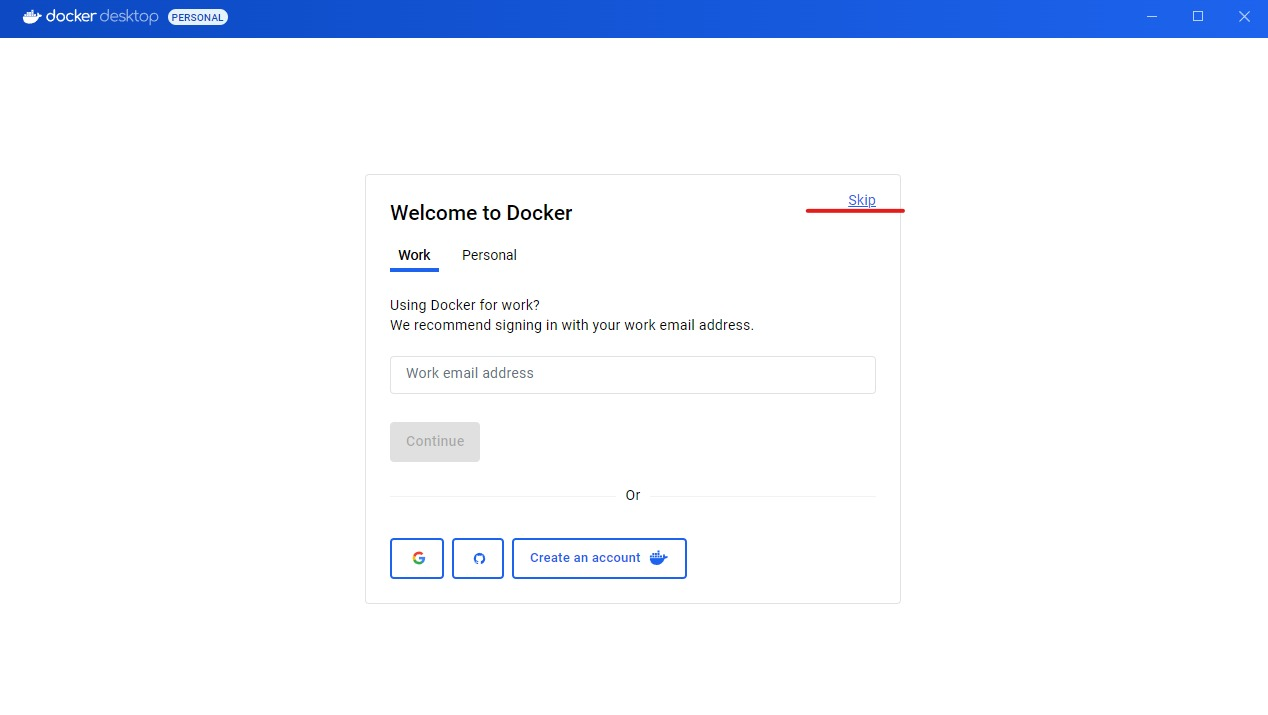

Ahora nos vamos a segurar que Docker este usando WSL 2 based engine. Para ello vamos a hacer click arriba a la derecha en el botón de settings y luego chequeamos que la opción `Use the WSL 2 based engine` este tildada

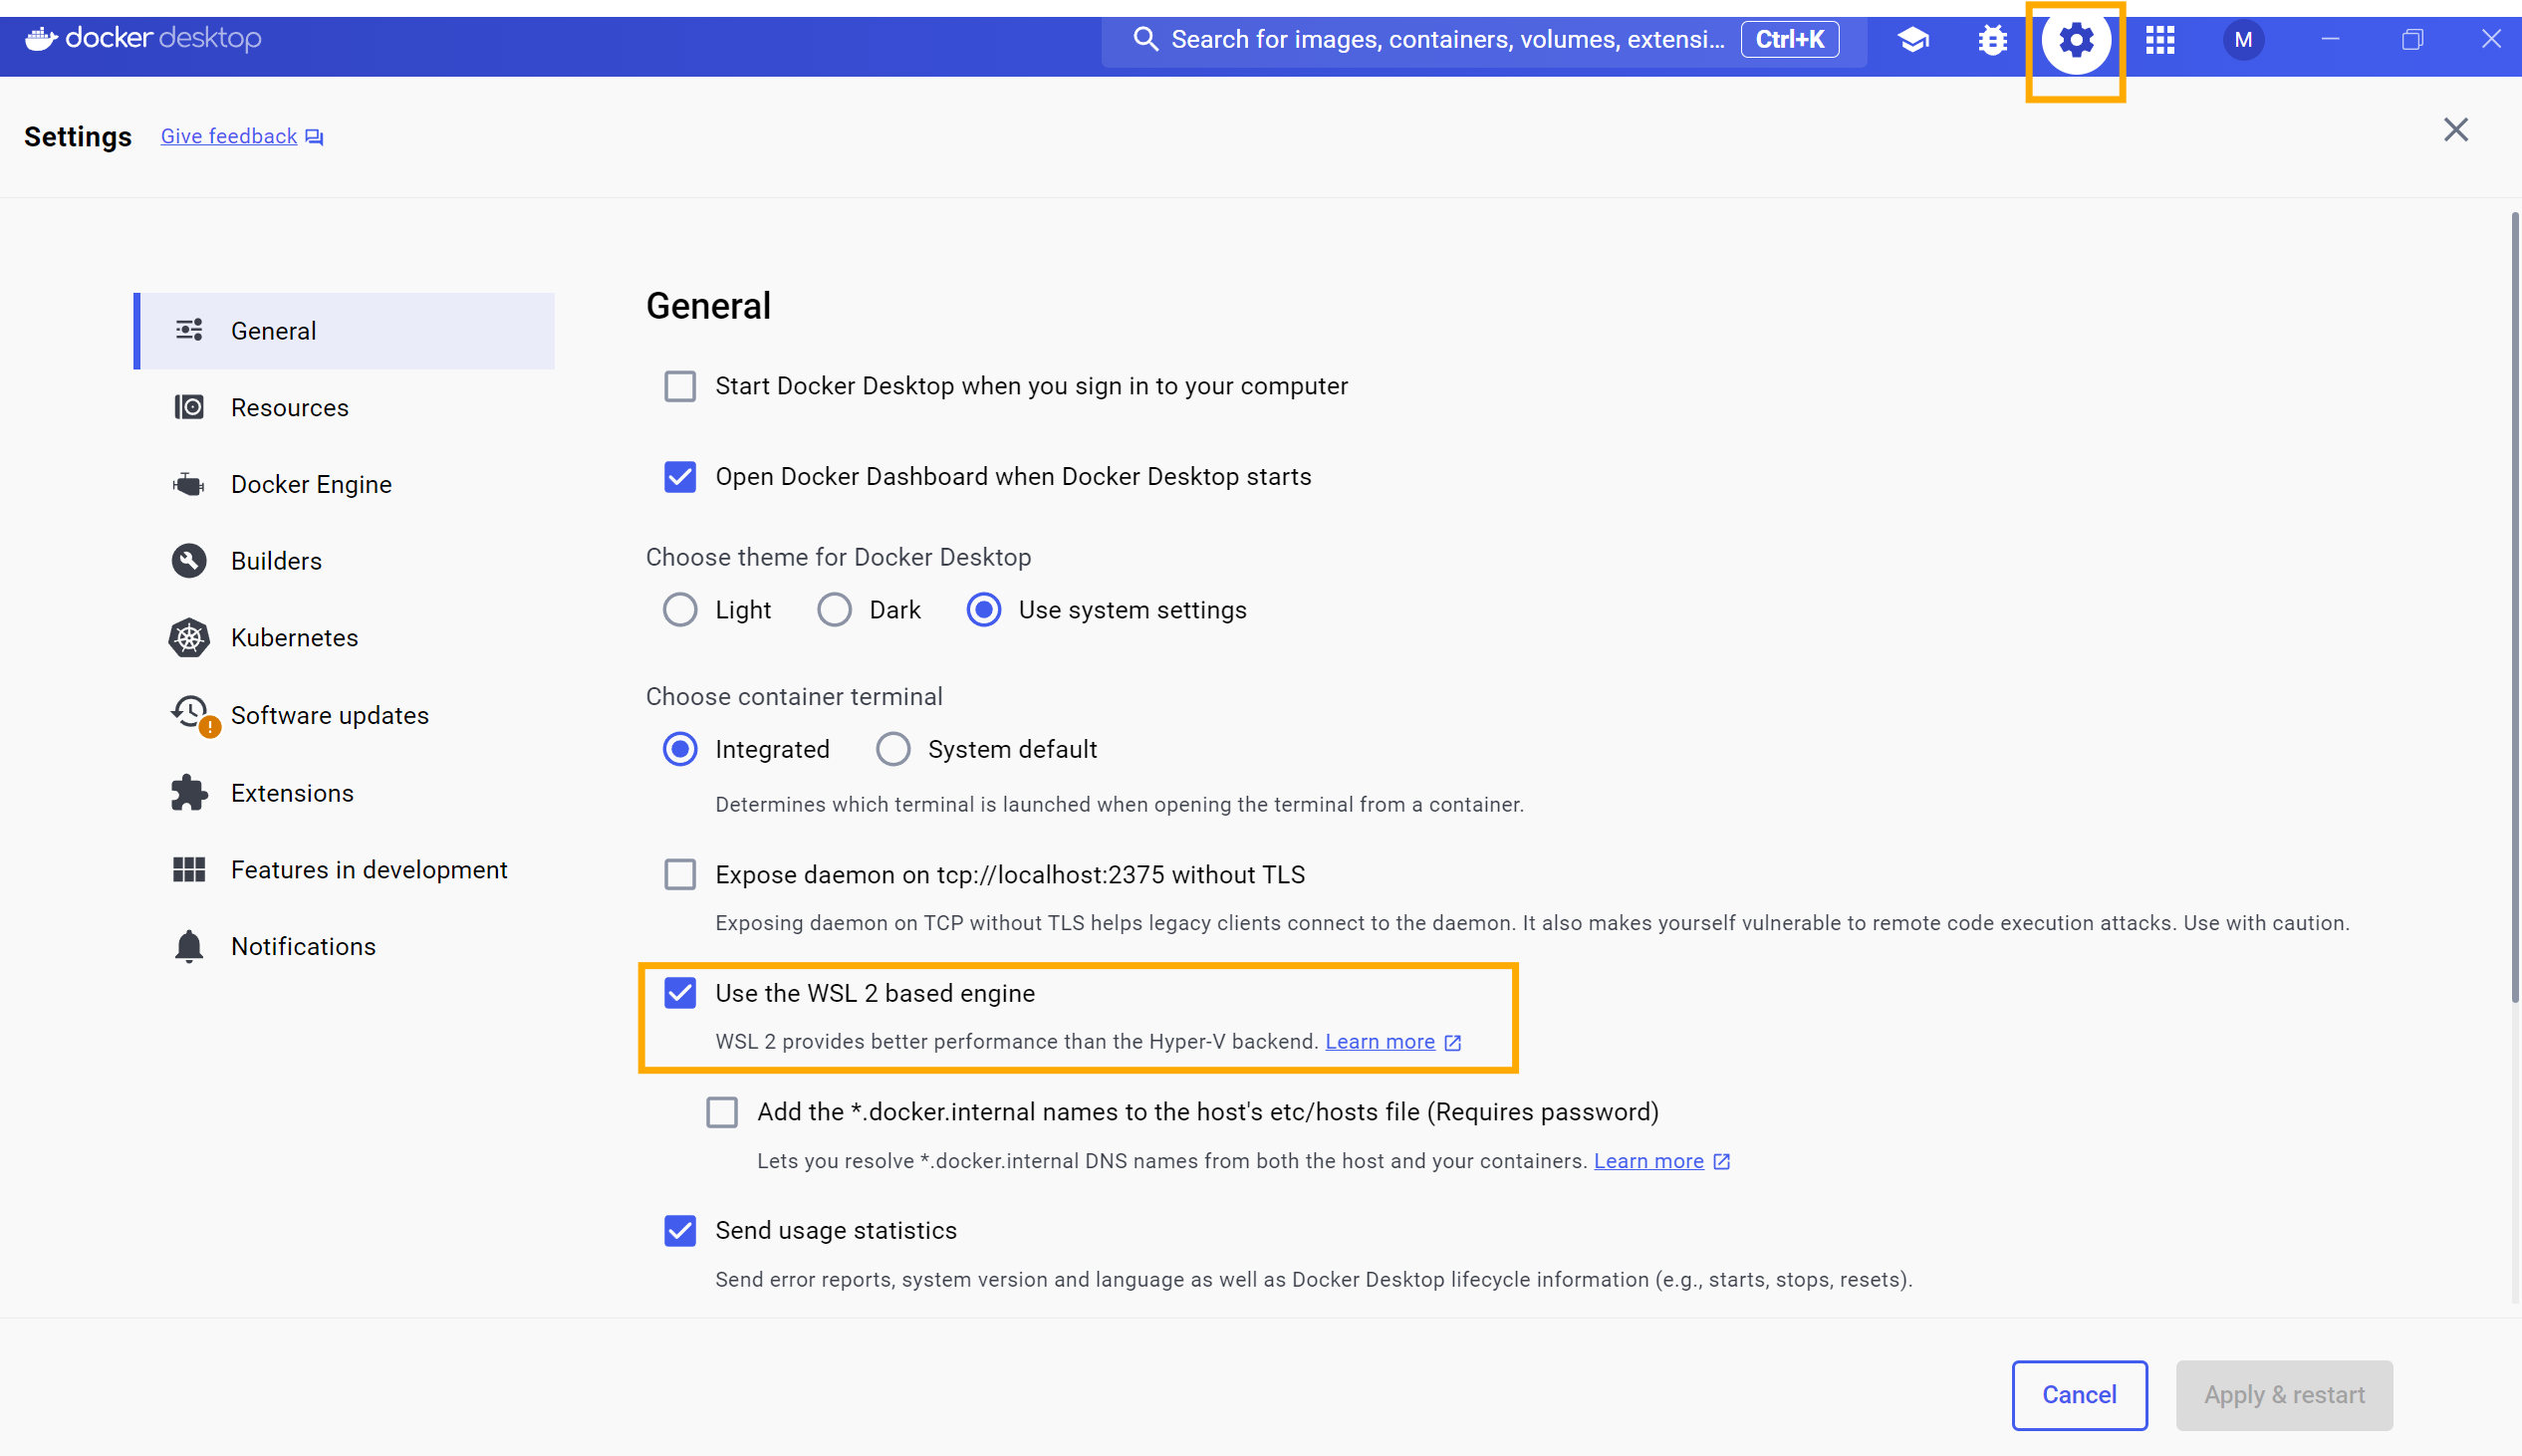

---

## Dockerfiles y Construcción de Imágenes

**¿Qué es un Dockerfile?**:

Un Dockerfile es un archivo de texto que contiene un conjunto de instrucciones que Docker usa para crear una imagen. Las imágenes de Docker son plantillas inmutables que incluyen todo lo necesario para ejecutar una aplicación: el sistema operativo base, bibliotecas, dependencias, archivos del proyecto y el código.

Cuando creas un contenedor, en realidad estás ejecutando una instancia de una imagen. El Dockerfile especifica cómo debe construirse esta imagen paso a paso.

**Cómo funciona un Dockerfile**

Un Dockerfile está compuesto por instrucciones que son interpretadas por Docker. Al ejecutar el comando `docker build`, Docker lee el Dockerfile, ejecuta cada instrucción y crea una imagen paso a paso. Estas imágenes son luego reutilizables y pueden compartirse a través de registros como Docker Hub o privados.

Cada línea de un Dockerfile genera una "capa" dentro de la imagen. Docker usa el concepto de caché de capas para optimizar la construcción de imágenes. Si una capa no ha cambiado, Docker reutilizará esa capa de la imagen anterior para acelerar el proceso de construcción.

**Estructura Básica de un Dockerfile**

El siguiente es un ejemplo básico de un Dockerfile para una aplicación Python:

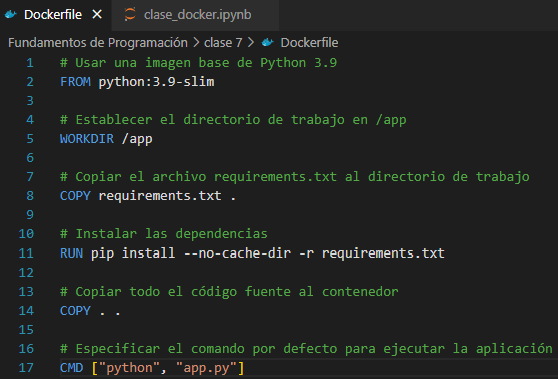

Veamos cada una de estas instrucciones en detalle.

### Instrucciones Comunes en un Dockerfile

**FROM**

FROM especifica la imagen base que se utilizará para construir la nueva imagen. Es el punto de partida de la imagen. Por ejemplo, `FROM python:3.9-slim`
indica que la imagen base es una versión ligera de Python 3.9. Docker descargará esta imagen desde Docker Hub si no está disponible localmente.

**WORKDIR**

WORKDIR establece el directorio de trabajo dentro del contenedor. Todas las instrucciones posteriores del Dockerfile se ejecutarán en este directorio. Por ejemplo, `WORKDIR /app`
establece /app como el directorio donde se ejecutarán los comandos y donde se copiarán los archivos.

**COPY**

COPY copia archivos o directorios desde el sistema de archivos del host al sistema de archivos del contenedor. Por ejemplo, `COPY requirements.txt .`
copia el archivo requirements.txt del directorio actual en tu máquina host al directorio de trabajo dentro del contenedor (/app en este caso).

**RUN**

RUN ejecuta comandos en el contenedor durante el proceso de construcción de la imagen. Es comúnmente usado para instalar dependencias o ejecutar scripts. Por ejemplo, `RUN pip install --no-cache-dir -r requirements.txt` instala las dependencias de Python listadas en el archivo requirements.txt. La opción --no-cache-dir evita que pip almacene en caché las dependencias instaladas, lo que ayuda a reducir el tamaño de la imagen.

**CMD**

CMD especifica el comando predeterminado que se ejecutará cuando se inicie el contenedor. Solo puede haber un CMD en un Dockerfile, y si se sobrescribe en tiempo de ejecución, se ignorará. Por ejemplo, `CMD ["python", "app.py"]` ejecutará el script app.py cuando el contenedor sea iniciado.
 

### Otras Instrucciones Útiles en Dockerfiles

**ENV**

ENV se utiliza para definir variables de entorno dentro del contenedor. Esto es útil para configurar opciones que pueden cambiar entre entornos (desarrollo, producción, etc.). Por ejemplo, `ENV FLASK_ENV=production`

**EXPOSE**

EXPOSE documenta el puerto en el que el contenedor espera recibir conexiones, pero no abre ese puerto en el host. Este puerto deberá ser mapeado al host cuando se ejecute el contenedor. Por ejemplo, `EXPOSE 5000` indica que la aplicación dentro del contenedor usará el puerto 5000, comúnmente utilizado por Flask.

**ENTRYPOINT**

ENTRYPOINT define un comando que siempre será ejecutado cuando el contenedor se inicie. A diferencia de CMD, las opciones que se le pasen al contenedor se adjuntarán al ENTRYPOINT. Por ejemplo

`ENTRYPOINT ["python", "manage.py"]`

`CMD ["runserver"]`

En este caso, si ejecutas el contenedor sin parámetros adicionales, se ejecutará python manage.py runserver. Si pasas otros comandos, estos reemplazarán runserver, pero manage.py siempre será ejecutado.

**ADD**

ADD es similar a COPY, pero con algunas diferencias. ADD puede descargar archivos desde URLs o descomprimir archivos comprimidos en el destino. Por ejemplo, `ADD http://example.com/file.tar.gz /tmp/file.tar.gz`.
 

### Construcción de una imagen

El comando docker build se utiliza para construir una imagen a partir de un Dockerfile. La sintaxis básica es: `docker build -t nombre_imagen:tag .`

* -t nombre_imagen:tag: Asigna un nombre y una etiqueta (tag) a la imagen. Si no especificas una etiqueta, Docker usará latest por defecto.
* .: Especifica el contexto de construcción. El punto (.) indica que Docker debe buscar el Dockerfile y otros archivos en el directorio actual.

ejemplo: `docker build -t mi_app:1.0 .`  Este comando construirá una imagen llamada mi_app con la etiqueta 1.0 utilizando el Dockerfile que está en el directorio actual.

Verificar la imagen creada: puedes ver las imágenes que has construido utilizando el comando `docker images` Esto listará todas las imágenes que has construido en tu sistema, junto con sus nombres, etiquetas, y tamaños.

### Buenas Prácticas para Construir Imágenes de Docker

1. Usar imágenes base ligeras:

   * Siempre que sea posible, utiliza imágenes base ligeras como alpine o versiones slim de las imágenes oficiales (python:3.9-slim). Esto reduce el tamaño de la imagen y acelera el despliegue.
   * Ejemplo: python:3.9-alpine es una versión mucho más ligera de Python.

2. Minimizar el número de capas:

   * Cada instrucción en un Dockerfile genera una nueva capa en la imagen. Para reducir el tamaño de la imagen, combina múltiples instrucciones RUN en una sola línea cuando sea posible. Ejemplo:
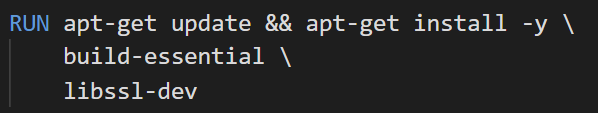

3. Eliminar archivos innecesarios:

   * Usa la opción --no-cache-dir al instalar paquetes, o elimina archivos temporales al final de una instrucción RUN para evitar que esos archivos se queden en la imagen final. Ejemplo:
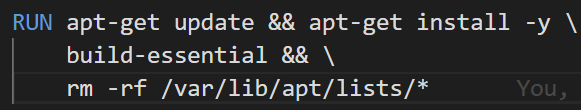

4. Especificar el puerto adecuado con EXPOSE:

   * Aunque EXPOSE no abre puertos automáticamente, es buena práctica indicar cuál es el puerto que la aplicación utiliza para hacer más claro cómo interactuar con el contenedor.

5. Usar COPY en lugar de ADD cuando sea posible:

   * A menos que necesites descargar archivos de una URL o descomprimir archivos, COPY es preferido sobre ADD, ya que es más predecible.

6. Establecer variables de entorno con ENV:

   * Usa ENV para definir variables de entorno que pueden cambiar entre entornos (desarrollo, pruebas, producción).

---

## Ejecutar y Gestionar Contenedores. Uso Básico de Contenedores

Un contenedor en Docker es una instancia de una imagen que está ejecutándose. Un contenedor puede contener cualquier cosa, desde una simple aplicación hasta un conjunto de servicios. Docker permite ejecutar, detener, eliminar y gestionar estos contenedores de manera muy eficiente.

### Ejecutar un Contenedor

El comando básico para ejecutar un contenedor es docker run. Este comando crea e inicia una instancia de una imagen en un contenedor. Sintaxis básica de docker run:

`docker run [opciones] imagen [comando]`

* imagen: Especifica la imagen que se va a utilizar para crear el contenedor.
* opciones: Puedes especificar diversas opciones, como el mapeo de puertos, nombres del contenedor, volúmenes, entre otros.
* comando: Puedes sobrescribir el comando predeterminado que se ejecutará en el contenedor.

Ejemplo básico: Ejecutar un contenedor NGINX

`docker run -d -p 8080:80 --name mi_nginx nginx`

* -d: Ejecuta el contenedor en segundo plano (modo "desacoplado").
* -p 8080:80: Mapea el puerto 8080 del host al puerto 80 del contenedor (el puerto en el que NGINX escucha).
* --name mi_nginx: Asigna el nombre "mi_nginx" al contenedor para referirse a él fácilmente más tarde.
* nginx: Es la imagen que se está utilizando para crear el contenedor.

Una vez que se ejecuta este comando, puedes acceder al servidor web NGINX en http://localhost:8080 (o en la IP de tu máquina).

### Gestionar Contenedores

Una vez que has iniciado uno o más contenedores, Docker proporciona una serie de comandos para gestionarlos.

**Listar Contenedores**

Puedes listar los contenedores en ejecución o todos los contenedores (incluyendo los que están detenidos).

* Listar contenedores en ejecución:

`docker ps`

Esto muestra una lista de los contenedores que están corriendo en ese momento, junto con su ID, nombre, imagen y otros detalles.

* Listar todos los contenedores (incluyendo los detenidos):

`docker ps -a`

Esto muestra todos los contenedores, independientemente de si están en ejecución o no.

**Detener un Contenedor**

Si necesitas detener un contenedor que está en ejecución, puedes usar el comando docker stop seguido del nombre o ID del contenedor. Ejemplo:

`docker stop mi_nginx`

Este comando detiene el contenedor llamado "mi_nginx". Docker envía una señal SIGTERM al proceso principal del contenedor, y si el contenedor no se detiene en unos segundos, Docker enviará una señal SIGKILL.

**Reiniciar un Contenedor**

Puedes reiniciar un contenedor que se haya detenido utilizando docker start. Ejemplo:

`docker start mi_nginx`

Esto vuelve a iniciar el contenedor "mi_nginx" sin necesidad de crear uno nuevo.

**Eliminar un Contenedor**

Para liberar recursos, puedes eliminar contenedores que ya no necesites. Ten en cuenta que un contenedor debe estar detenido antes de que pueda eliminarse. Ejemplo:

`docker rm mi_nginx`

Este comando elimina el contenedor "mi_nginx". Si el contenedor aún está corriendo, primero debes detenerlo antes de eliminarlo.

* Eliminar varios contenedores a la vez:

`docker rm $(docker ps -a -q)`

Esto eliminará todos los contenedores que están detenidos.

**Ver los Logs de un Contenedor**

Docker registra toda la salida estándar (stdout) y error estándar (stderr) de un contenedor. Puedes ver estos logs usando el comando docker logs. Ejemplo:

`docker logs mi_nginx`

Esto mostrará los logs del contenedor "mi_nginx".

**Ejecutar Comandos dentro de un Contenedor**

Puedes ejecutar comandos dentro de un contenedor en ejecución usando docker exec. Esto es útil cuando necesitas inspeccionar o depurar el entorno dentro del contenedor.Ejemplo ejecutar un shell en un contenedor:

`docker exec -it mi_nginx /bin/bash`

Esto te abre una sesión interactiva dentro del contenedor "mi_nginx", donde puedes ejecutar comandos directamente dentro del entorno del contenedor.

* Opciones:

  * -i: Mantiene la entrada estándar del contenedor abierta.
  * -t: Asigna una pseudo-terminal.

### Uso Básico de Contenedores

Veamos algunas situaciones comunes de uso de contenedores, desde acceder a aplicaciones hasta trabajar con volúmenes para persistencia de datos.

**Acceso a Aplicaciones desde Contenedores**

Cuando ejecutas una aplicación dentro de un contenedor, necesitas hacerla accesible desde el exterior, generalmente mapeando puertos entre el host y el contenedor. Ejemplo Mapeo de puertos:

`docker run -d -p 5000:5000 flask-app`

Este comando ejecuta una aplicación Flask dentro de un contenedor y mapea el puerto 5000 del host al puerto 5000 dentro del contenedor, de modo que puedes acceder a la aplicación en http://localhost:5000.


**Persistencia de Datos con Volúmenes**

Por defecto, los datos dentro de un contenedor desaparecen cuando el contenedor es eliminado. Para persistir los datos entre ejecuciones del contenedor, puedes usar volúmenes de Docker. Los volúmenes permiten que los datos sean almacenados en el host y compartidos con el contenedor.

* Crear un volumen y montarlo en un contenedor:

`docker run -d -p 8080:80 -v /mi/directorio/host:/var/www/html nginx`

En este caso, el directorio /mi/directorio/host en tu máquina host se monta en el directorio /var/www/html dentro del contenedor. Los cambios en cualquiera de los dos serán visibles en ambos lados, lo que es útil para persistir datos o compartir archivos entre el contenedor y el host.

**Inspeccionar el Estado de un Contenedor**

Si deseas ver información detallada sobre un contenedor, como las redes, los volúmenes conectados o el estado de los procesos, puedes usar el comando docker inspect. Ejemplo:

`docker inspect mi_nginx`

Este comando devuelve un JSON con toda la información del contenedor, incluyendo detalles sobre el sistema de archivos, configuración de red, puertos, y más.

**Detención y Eliminación Automática de Contenedores**

Si no necesitas que un contenedor siga existiendo después de que su proceso haya terminado, puedes usar la opción --rm, que elimina automáticamente el contenedor una vez que se detiene. Ejemplo:

`docker run --rm -it ubuntu echo "Contenedor terminado"`

En este ejemplo, Docker ejecuta un contenedor con la imagen ubuntu, imprime "Contenedor terminado", y luego automáticamente elimina el contenedor.

---

## Ciclo de Vida de un Contenedor en Docker

1. Crear: Un contenedor se crea a partir de una imagen con el comando `docker create` o `docker run`.
   
2. Iniciar: Un contenedor creado puede ser iniciado con el comando `docker start`.
   
3. Parar: Puedes detener un contenedor en ejecución con `docker stop`.
   
4. Reiniciar: Un contenedor puede ser reiniciado con `docker restart`.
   
5. Eliminar: Finalmente, un contenedor que ya no se necesita puede ser eliminado con `docker rm`.

### Resumen del Uso Básico de Contenedores

* Crear y ejecutar un contenedor: `docker run`
  
* Listar contenedores en ejecución: `docker ps`

* Detener un contenedor: `docker stop`

* Eliminar un contenedor: `docker rm`

* Ver los logs de un contenedor: `docker logs`

* Acceder a un contenedor en ejecución: `docker exec`

* Persistencia de datos: Usar volúmenes con `docker run -v`

Estas operaciones son fundamentales para gestionar y utilizar contenedores en Docker de manera eficiente, permitiendo un control total sobre cómo se ejecutan y manejan las aplicaciones en entornos aislados.

---

## Servidores, Puertos y Docker: Entendiendo la Exposición de Servicios

### **¿Qué es un servidor?**

Un servidor es un sistema (puede ser hardware o software) que responde a solicitudes de otros programas, conocidos como clientes. Los servidores proporcionan servicios o recursos, como:

* Servir páginas web.
* Proveer archivos a través de una red.
* Ejecutar aplicaciones de manera remota.

Por ejemplo, cuando visitas un sitio web, tu navegador (cliente) envía una solicitud a un servidor web que "sirve" la página solicitada.

**Tipos de servidores comunes**:

* Servidor web: Maneja solicitudes HTTP/HTTPS y entrega páginas web (Ej.: Apache, NGINX).
* Servidor de base de datos: Responde a solicitudes de bases de datos (Ej.: MySQL, PostgreSQL).
* Servidor de aplicaciones: Ejecuta y entrega aplicaciones o servicios específicos (Ej.: servidores Node.js, Flask).

**¿Qué son los puertos?**

Los puertos son canales lógicos que permiten que un servidor gestione múltiples conexiones de red simultáneas. Cada puerto está asociado a un número, que va de 0 a 65535, y se utiliza para diferenciar servicios dentro de una misma máquina. Por ejemplo:

* El puerto 80 es el puerto predeterminado para el tráfico HTTP.
* El puerto 443 es el predeterminado para HTTPS (tráfico web cifrado).
* El puerto 8080 es comúnmente utilizado para pruebas de aplicaciones web o para servidores proxy.

Cuando un servidor está activo en una máquina, escucha solicitudes en uno o más puertos específicos. El puerto es esencialmente el "punto de acceso" donde un cliente puede enviar una solicitud al servidor.

### Puertos en Docker: Entendiendo el mapeo de puertos

Cuando ejecutas una aplicación dentro de un contenedor de Docker, como un servidor web o de aplicaciones, este necesita estar accesible desde el exterior. Dado que los contenedores están aislados del sistema host, no pueden acceder a los puertos de la máquina directamente a menos que se configure.

Mapeo de puertos en Docker: El mapeo de puertos es el proceso por el cual se conecta un puerto en el sistema host (tu computadora) con un puerto en el contenedor. Esto permite que el contenedor, que ejecuta un servidor, sea accesible desde la red o desde tu navegador a través del puerto del host.

Ejemplo del mapeo de puertos: `docker run -d -p 8080:80 nginx`

Este comando hace lo siguiente:

* -d ejecuta el contenedor en modo desacoplado (en segundo plano).
* -p 8080:80 mapea el puerto 8080 del host (tu computadora) al puerto 80 del contenedor (donde el servidor NGINX está escuchando).

Lo que esto significa:

* Puerto 80 en el contenedor: Dentro del contenedor, NGINX está configurado para escuchar en el puerto 80, ya que es el puerto predeterminado para los servidores web.
* Puerto 8080 en el host: El puerto 8080 en el host es donde tú, como usuario, puedes acceder al servidor. Entonces, si abres un navegador y visitas http://localhost:8080, estarás enviando una solicitud al puerto 8080 de tu máquina, que redirigirá la solicitud al puerto 80 del contenedor.

Este mapeo permite que el servidor web dentro del contenedor sea accesible externamente a través de tu máquina host.

**Por qué usar puertos diferentes (ejemplo del 8080 vs 80)**

En muchos casos, el puerto 80 ya puede estar ocupado en tu máquina host por otro servidor o servicio, o puede requerir permisos de administrador para ser utilizado. El puerto 8080 se usa comúnmente como una alternativa segura para pruebas y desarrollo, ya que:

* Es fácil de recordar.
* No suele estar ocupado por servicios del sistema.
* No requiere permisos especiales en la mayoría de los sistemas operativos.

Sin embargo, dentro del contenedor, el servidor web escucha en el puerto 80, que es el puerto estándar para tráfico HTTP.

### Más sobre la conexión entre el host y el contenedor

Docker utiliza una red interna para comunicar el host y los contenedores. El mapeo de puertos crea un "túnel" entre el puerto del contenedor y un puerto accesible desde el host. Si no realizas este mapeo explícitamente, el contenedor puede estar corriendo, pero no podrás acceder a su servicio desde el host.

Comando para verificar los puertos asignados a los contenedores:
Si has olvidado los puertos que están mapeados, puedes verificar esta información con el siguiente comando: `docker ps`

Esto mostrará una lista de los contenedores en ejecución, incluyendo los puertos mapeados en el formato HostPort:ContainerPort

**Ejemplo práctico de mapeo de puertos con un servidor Flask**

Supongamos que tienes una aplicación Flask simple dentro de un contenedor Docker y la quieres hacer accesible desde el puerto 5000 de tu host. El puerto por defecto para Flask es el 5000 dentro del contenedor.

1. Dockerfile para una app Flask:

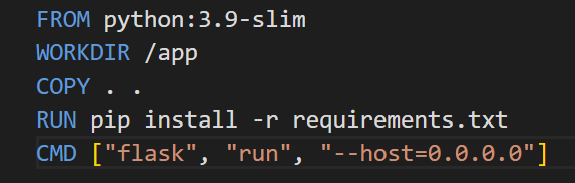

2. Comando para construir y ejecutar la aplicación:

`docker build -t flask-app .`

`docker run -d -p 5000:5000 flask-app`

* Host: El puerto 5000 en el host será accesible.
* Contenedor: El puerto 5000 dentro del contenedor es donde Flask está escuchando.

3. Acceder a la aplicación:

Abre un navegador y ve a http://localhost:5000 para ver la aplicación Flask en funcionamiento

---

## Proyecto Demo en un repositorio

Con el siguiente link podrán acceder a un repositorio donde esta subido un proyecto demo usando la API que vimos en el Jupyter notebook de la clase de APIS. Contiene una estructura básica para que ustedes puedan empezar a estructurar su proyecto personal.

https://github.com/Eduardo-Merino/proyecto-demo